## Happiness 2019

In the dataset we will observe happiness 2019 dataset. This dataset gives the happiness rank and happiness score of 156 countries around the world based on six factors including GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption. Sum of the value of these six factors gives us the happiness score and the higher the happiness score, the lower the happiness rank. So, it is evident that the higher value of each of these six factors means the level of happiness is higher. We can define the meaning of these factors as the extent to which these factors lead to happiness.

In [1]:
# Import all libraries we need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Evaluation Metric
from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2019.csv


In [2]:
df = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


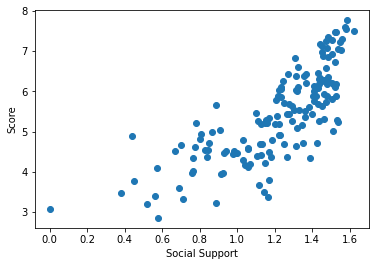

In [4]:
# plot data
plt.scatter(df["Social support"],df["Score"])
plt.xlabel("Social Support")
plt.ylabel("Score")
plt.show()


## Linear Regression

In [5]:
# linear regression model
linear_reg = LinearRegression()

x = df["Social support"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

linear_reg.fit(x,y)

LinearRegression()

### Prediction

In [6]:
Predicted_Score1 = linear_reg.predict([[1.5]])
print("Predicted Score 1: ",Predicted_Score1)

Predicted_Score2 = linear_reg.predict([[0.5]])
print("Predicted Score 2: ",Predicted_Score2)

Predicted_Score3 = linear_reg.predict([[1.8]])
print("Predicted Score 3: ",Predicted_Score3)

intercept = linear_reg.intercept_
print("intercept: ",intercept)   # y eksenini kestigi nokta intercept

slope = linear_reg.coef_
print("slope: ",slope)   # egim slope

# Score = 1.91243024 + 2.89098704*Social Support 



Predicted Score 1:  [[6.24891081]]
Predicted Score 2:  [[3.35792377]]
Predicted Score 3:  [[7.11620692]]
intercept:  [1.91243024]
slope:  [[2.89098704]]


### Visualization

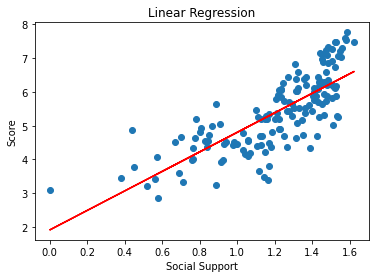

r_score:  0.6038188059907054


In [7]:
y_predicted = linear_reg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_predicted,color = "red")
plt.xlabel("Social Support")
plt.ylabel("Score")
plt.title("Linear Regression")
plt.show()
print("r_score: ", r2_score(y,y_predicted))

## Multiple Linear Regression

In [8]:
# Multiple Linear Regression Model
x = df.iloc[:,3:].values
y = df["Score"].values.reshape(-1,1)
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

LinearRegression()

### Prediction

In [9]:
print("Intercept: ", multiple_linear_regression.intercept_)
print("b1,b2,b3,b4,b5,b6: ",multiple_linear_regression.coef_)

Intercept:  [1.79522023]
b1,b2,b3,b4,b5,b6:  [[0.77537163 1.12419158 1.07814273 1.45483237 0.48978335 0.97228022]]


In [10]:
# prediction
multiple_linear_regression.predict(np.array([[1.340,1.587,0.986,0.596,0.153,0.393]]))

array([[7.00548205]])

## Polynomial Regression

In [11]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


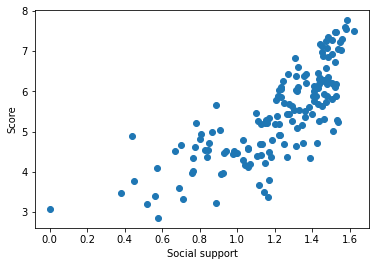

In [12]:
# plot data
plt.scatter(df["Social support"],df["Score"])
plt.xlabel("Social support")
plt.ylabel("Score")
plt.show()

In [13]:
x = df["Healthy life expectancy"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

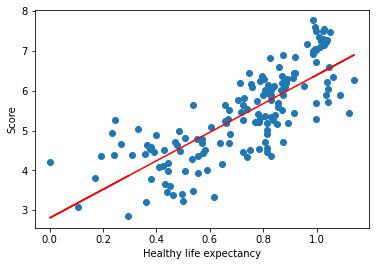

In [14]:
lr = LinearRegression()
lr.fit(x,y)
y_head = lr.predict(x)
plt.scatter(df["Healthy life expectancy"],df["Score"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Score")
plt.plot(x,y_head,color="red",label ="linear")
plt.show()

In [15]:
polynomial_regression = PolynomialFeatures(degree = 2)
x_polynomial = polynomial_regression.fit_transform(x)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

LinearRegression()

### Visualization

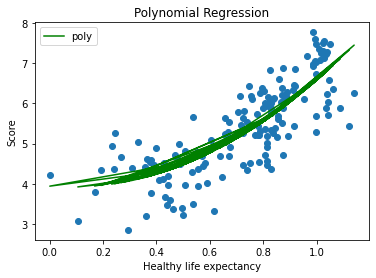

r_square score:  0.643517048077236


In [16]:
y_head2 = linear_regression2.predict(x_polynomial)
plt.scatter(df["Healthy life expectancy"],df["Score"])
plt.xlabel("Healthy life expectancy")
plt.ylabel("Score")
plt.plot(x,y_head2,color= "green",label = "poly")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
print("r_square score: ", r2_score(y,y_head2))

## Decision Tree

In [17]:
x = df["GDP per capita"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

In [18]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)
tree_reg.predict([[1.2]])
x_ = np.arange(min(x),max(x),0.1).reshape(-1,1)
y_head = tree_reg.predict(x_)

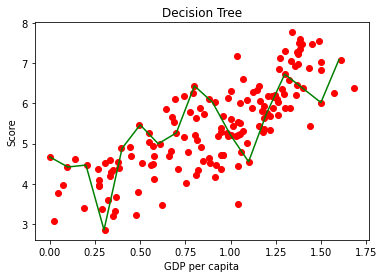

In [19]:
# visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color = "green")
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.title("Decision Tree")
plt.show()

## Random Forest

In [20]:
x = df["Freedom to make life choices"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

In [21]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x,y)
print("Predicted Value = : ",rf.predict([[0.5]]))
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)

Predicted Value = :  [5.40538138]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


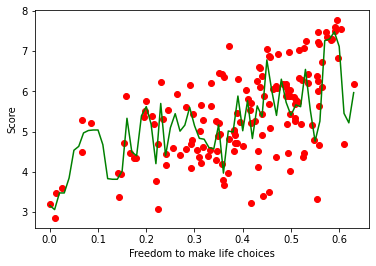

In [22]:
# visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Score")
plt.show()